# BLM008 analysis from loggin

In [15]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [17]:
infile = open("/eos/user/e/eljohnso/SWAN_projects/quad-scan-east/quad_scan_t8_ions_2022_10_11_11h25m10s/quad_scan_t8_ions_2022_10_11_11h25m10s.p", 'rb')
loaded_pickle = pickle.load(infile)

In [21]:
loaded_pickle[0]

[datetime.datetime(2022, 10, 11, 11, 25, 14, 444385),
 datetime.datetime(2022, 10, 11, 11, 25, 24, 278451),
 datetime.datetime(2022, 10, 11, 11, 25, 32, 730416),
 datetime.datetime(2022, 10, 11, 11, 25, 47, 269196),
 datetime.datetime(2022, 10, 11, 11, 26, 4, 87184)]

Text(0.5, 1.0, 'BLM008-ST')

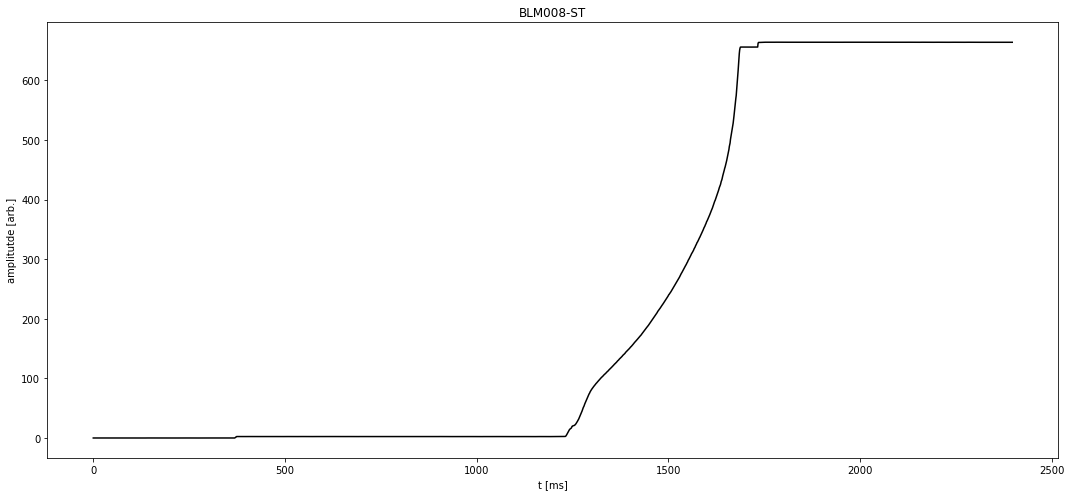

In [39]:
data = loaded_pickle[12]["F61.BLM008-ST/Samples"][0]["samples"]

fig, ax = plt.subplots(tight_layout=True, figsize=(15,7))
ax.plot(data, ms=1, color="k")
ax.set_xlabel("t [ms]")
ax.set_ylabel("amplitutde [arb.]")
ax.set_title("BLM008-ST")

In [81]:
blm_signal = np.ones(len(data))
for i in range(len(data)):
    if i>1:
        blm_signal[i] = data[i] - data[i-1]
    else:
        blm_signal[i] = data[i]

(1000.0, 1800.0)

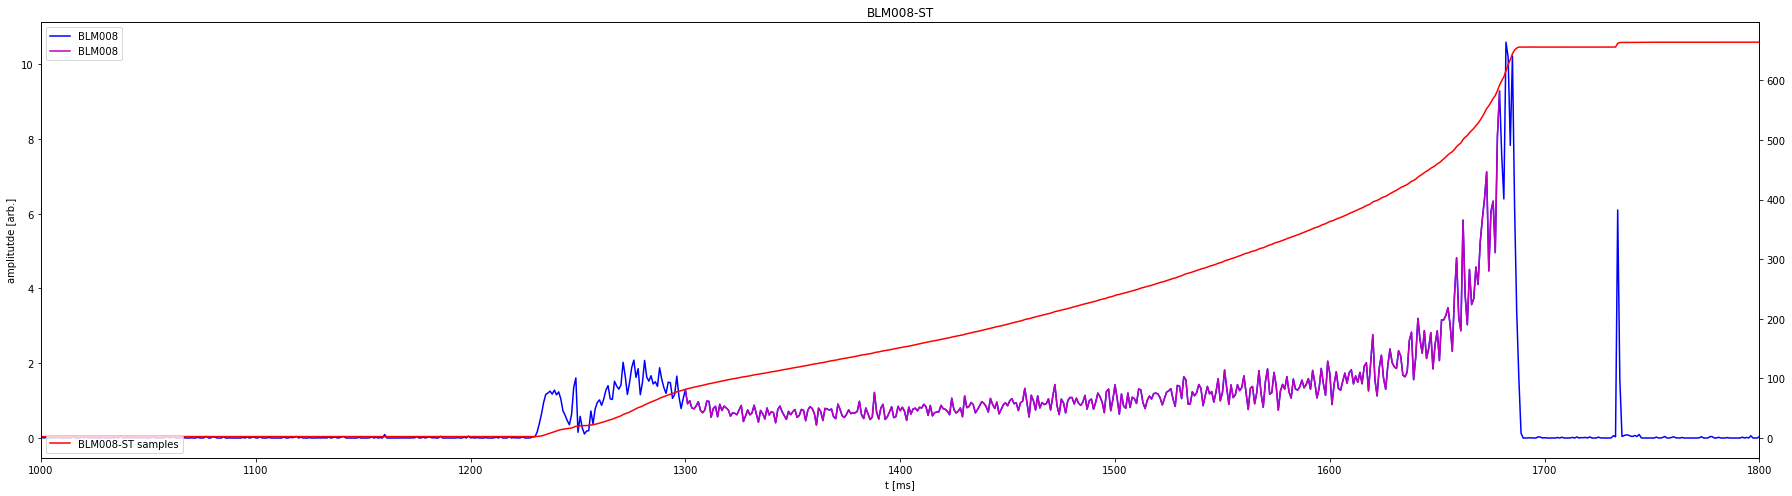

In [103]:
fig, ax = plt.subplots(tight_layout=True, figsize=(25,7))
t = np.arange(0, len(blm_signal), 1)
ax.plot(t, blm_signal, label="BLM008", color="b")
range_start = 1300
range_end = 1680
ax.plot(t[range_start:range_end], blm_signal[range_start:range_end], label="BLM008", color="m", zorder=99)
ax1=ax.twinx()
ax1.plot(data, label="BLM008-ST samples", color="r")
ax.set_xlabel("t [ms]")
ax.set_ylabel("amplitutde [arb.]")
ax.set_title("BLM008-ST")
ax.legend(loc="upper left")
ax1.legend(loc="lower left")
ax.set_xlim(1000,1800)

# FFT https://realpython.com/python-scipy-fft/

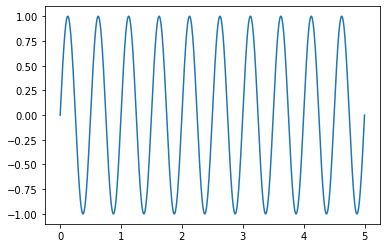

In [79]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [76]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

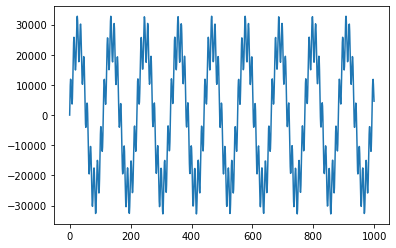

In [77]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

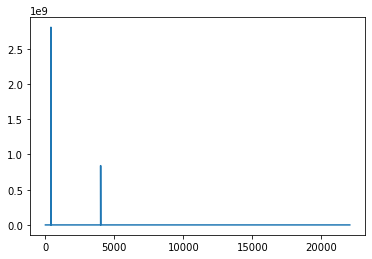

In [114]:
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

Text(0, 0.5, 'Amplitude [arb.]')

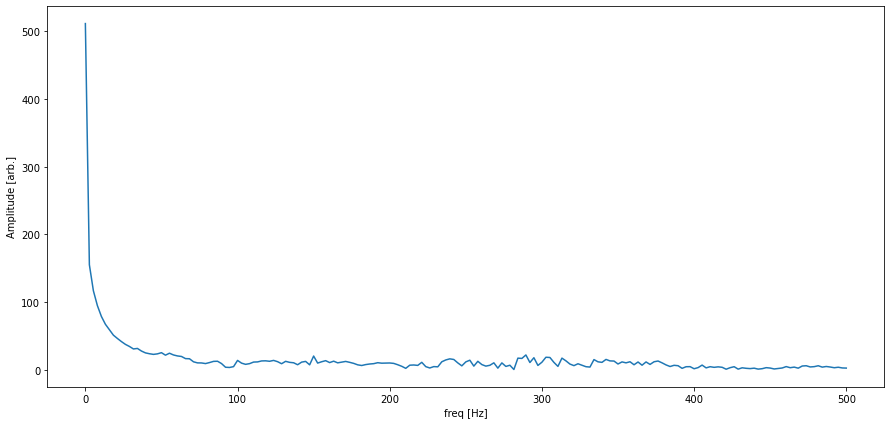

In [120]:
yf = rfft(blm_signal[range_start:range_end])
xf = rfftfreq(len(blm_signal[range_start:range_end]), 0.001)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(xf, np.abs(yf))
ax.set_xlabel("freq [Hz]")
ax.set_ylabel("Amplitude [arb.]")